# k-Mean And Harerchical Clustering

In [37]:
import pandas as pd

In [38]:
df=pd.read_csv('F:/imarticus/imarticus data given by sir/k-mean & hererchical clustering/mall_customers.csv')

In [39]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [40]:
numerical_features =df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_features))
print(numerical_features)
# Pulling out names of categorical variables by conditioning dtypes equal to object type
categorical_features = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_features))
print(categorical_features)

Number of Numerical features:  4
Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')
Number of Categorical features:  1
Index(['Gender'], dtype='object')


### Duplicate Values

In [41]:
df.duplicated().any()

False

### Check if any features are related to each other

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

corr =df.corr()
corr

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [43]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)

    return col_corr

In [44]:
corr_features = correlation(corr,0.85)
len(set(corr_features))

1

### dataframe reset

In [45]:
df.reset_index(drop=True,inplace=True)

# building k-mean clustering.....customers  who can be easily converge

In [46]:
data_1 =df.copy()

In [47]:
from sklearn.cluster import KMeans

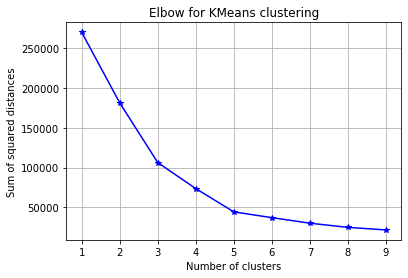

In [48]:
# clustering the samples based on health factors(child_mort, life_expec, total_fer)
data_clustering_1=df[['Annual Income (k$)','Spending Score (1-100)']]

# plot sum of squared distances (elbow method)
K = range(1,10)
data_km = [KMeans(n_clusters=k).fit(data_clustering_1) for k in K]
ssd = [data_km[k].inertia_ for k in range(len(data_km))]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(K, ssd, 'b*-')
plt.grid(True)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow for KMeans clustering')
plt.show()

### Considering k = 5

In [50]:
kmeans = KMeans(n_clusters=5)
model = kmeans.fit(data_clustering_1)
pred = model.labels_
data_1['clusters'] = pred
data_1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_km,clusters
0,1,Male,19,15,39,3,0
1,2,Male,21,15,81,1,3
2,3,Female,20,16,6,3,0
3,4,Female,23,16,77,1,3
4,5,Female,31,17,40,3,0
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1
196,197,Female,45,126,28,0,2
197,198,Male,32,126,74,2,1
198,199,Male,32,137,18,0,2


In [54]:
data_1['clusters'].unique()

array([0, 3, 4, 1, 2])

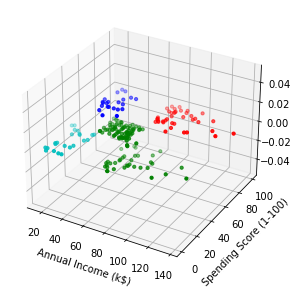

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cluster_0 = data_1.query('clusters==0')
cluster_1 = data_1.query('clusters==1')
cluster_2 = data_1.query('clusters==2')
cluster_3 = data_1.query('clusters==3')
cluster_4 = data_1.query('clusters==4')
plt_0 = ax.scatter(cluster_0['Annual Income (k$)'], cluster_0['Spending Score (1-100)'], c='c', s=10)
plt_1 = ax.scatter(cluster_1['Annual Income (k$)'], cluster_1['Spending Score (1-100)'], c='r', s=10)
plt_2 = ax.scatter(cluster_2['Annual Income (k$)'], cluster_2['Spending Score (1-100)'], c='g', s=10)
plt_3 = ax.scatter(cluster_3['Annual Income (k$)'], cluster_3['Spending Score (1-100)'], c='b', s=10)
plt_4 = ax.scatter(cluster_4['Annual Income (k$)'], cluster_4['Spending Score (1-100)'], c='g', s=10)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
#ax.set_zlabel('Vans')
plt.tight_layout()
plt.show()

In [56]:
cluster_2.sort_values(['Annual Income (k$)','Spending Score (1-100)'],ascending=True)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_km,clusters
124,125,Female,23,70,29,0,2
130,131,Male,47,71,9,0,2
128,129,Male,59,71,11,0,2
134,135,Male,20,73,5,0,2
136,137,Female,44,73,7,0,2
138,139,Male,19,74,10,0,2
140,141,Female,57,75,5,0,2
144,145,Male,25,77,12,0,2
146,147,Male,48,77,36,0,2
156,157,Male,37,78,1,0,2


### ANS=THIS ARE THE CUSTOMERS_ID WHO CAN EASILY BE CONVERGE,SO THAT MARKETING TEAM CAN PLAN THE STRATEGY ACCORDINGLY

# building hierarchical model......customers who can be easily converge

In [57]:
import scipy.cluster.hierarchy as shc

In [58]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model_1=cluster.fit_predict(data_clustering_1)
data_1['clusters_hiererchical'] = pred
data_1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_km,clusters,clusters_hiererchical
0,1,Male,19,15,39,3,0,0
1,2,Male,21,15,81,1,3,3
2,3,Female,20,16,6,3,0,0
3,4,Female,23,16,77,1,3,3
4,5,Female,31,17,40,3,0,0
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,1,1
196,197,Female,45,126,28,0,2,2
197,198,Male,32,126,74,2,1,1
198,199,Male,32,137,18,0,2,2


In [60]:
data_1['clusters_hiererchical'].unique()

array([0, 3, 4, 1, 2])

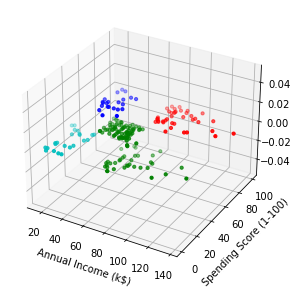

In [61]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
cluster_0_h = data_1.query('clusters_hiererchical==0')
cluster_1_h = data_1.query('clusters_hiererchical==1')
cluster_2_h = data_1.query('clusters_hiererchical==2')
cluster_3_h = data_1.query('clusters_hiererchical==3')
cluster_4_h = data_1.query('clusters_hiererchical==4')
plt_0_h = ax.scatter(cluster_0_h['Annual Income (k$)'], cluster_0_h['Spending Score (1-100)'], c='c', s=10)
plt_1_h = ax.scatter(cluster_1_h['Annual Income (k$)'], cluster_1_h['Spending Score (1-100)'], c='r', s=10)
plt_2_h = ax.scatter(cluster_2_h['Annual Income (k$)'], cluster_2_h['Spending Score (1-100)'], c='g', s=10)
plt_3_h = ax.scatter(cluster_3_h['Annual Income (k$)'], cluster_3_h['Spending Score (1-100)'], c='b', s=10)
plt_4_h = ax.scatter(cluster_4_h['Annual Income (k$)'], cluster_4_h['Spending Score (1-100)'], c='g', s=10)
ax.set_xlabel('Annual Income (k$)')
ax.set_ylabel('Spending Score (1-100)')
#ax.set_zlabel('Vans')
plt.tight_layout()
plt.show()

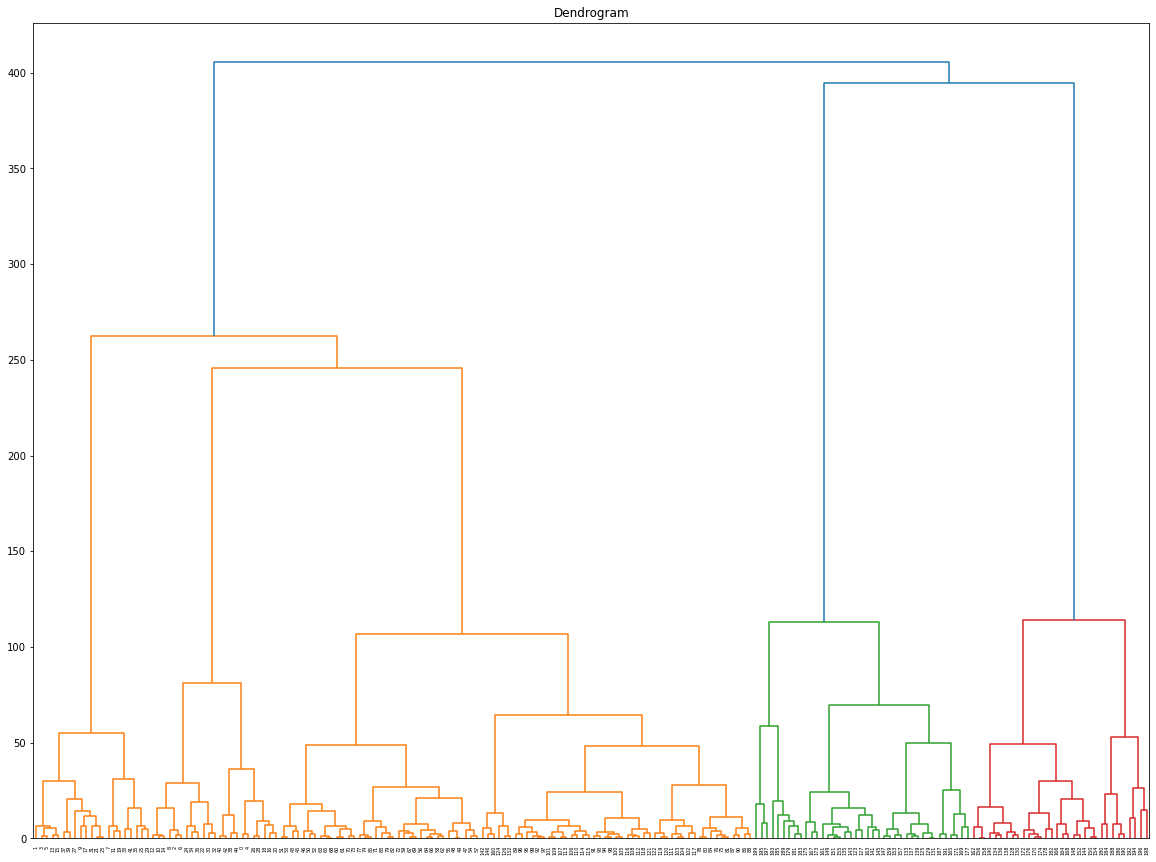

In [64]:
plt.figure(figsize=(20,15))
plt.title('Dendrogram')
dend = shc.dendrogram(shc.linkage(df[['Annual Income (k$)','Spending Score (1-100)']],method='ward'))

In [63]:
cluster_2_h.sort_values(['Annual Income (k$)','Spending Score (1-100)'],ascending=True)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_km,clusters,clusters_hiererchical
124,125,Female,23,70,29,0,2,2
130,131,Male,47,71,9,0,2,2
128,129,Male,59,71,11,0,2,2
134,135,Male,20,73,5,0,2,2
136,137,Female,44,73,7,0,2,2
138,139,Male,19,74,10,0,2,2
140,141,Female,57,75,5,0,2,2
144,145,Male,25,77,12,0,2,2
146,147,Male,48,77,36,0,2,2
156,157,Male,37,78,1,0,2,2


### ANS=THIS ARE THE CUSTOMERS_ID WHO CAN EASILY BE CONVERGE,SO THAT MARKETING TEAM CAN PLAN THE STRATEGY ACCORDINGLY